In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms, models

In [2]:
trans_train = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomResizedCrop(224),
    transforms.ToTensor()
])
trans_test = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomResizedCrop(224),
    transforms.ToTensor()
])

In [3]:
train_dataset = torchvision.datasets.ImageFolder('/home/salman/.keras/datasets/salman_and_minnu/train/',transform=trans_train)

In [4]:
test_dataset = torchvision.datasets.ImageFolder('/home/salman/.keras/datasets/salman_and_minnu/validation/',transform=trans_test)

In [5]:
train_dataset.classes

['minnu', 'salman']

In [6]:
train_dataset

Dataset ImageFolder
    Number of datapoints: 100
    Root location: /home/salman/.keras/datasets/salman_and_minnu/train/
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear), antialias=None)
               ToTensor()
           )

In [7]:
test_dataset

Dataset ImageFolder
    Number of datapoints: 40
    Root location: /home/salman/.keras/datasets/salman_and_minnu/validation/
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear), antialias=None)
               ToTensor()
           )

In [8]:
batch_size = 2

In [9]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

In [10]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                         batch_size = batch_size,
                                         shuffle = False)

In [12]:
examples = iter(train_loader)
samples ,labels = next(examples)
print(samples.shape)
labels

torch.Size([2, 3, 224, 224])


tensor([1, 1])

In [13]:
def imshow(img,title):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(25,20))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(title)
    plt.show()

In [14]:
sample_plot = samples[0:2]
label_plot = labels[0:2]

In [15]:
out = torchvision.utils.make_grid(sample_plot)

In [16]:
class_name = train_dataset.classes

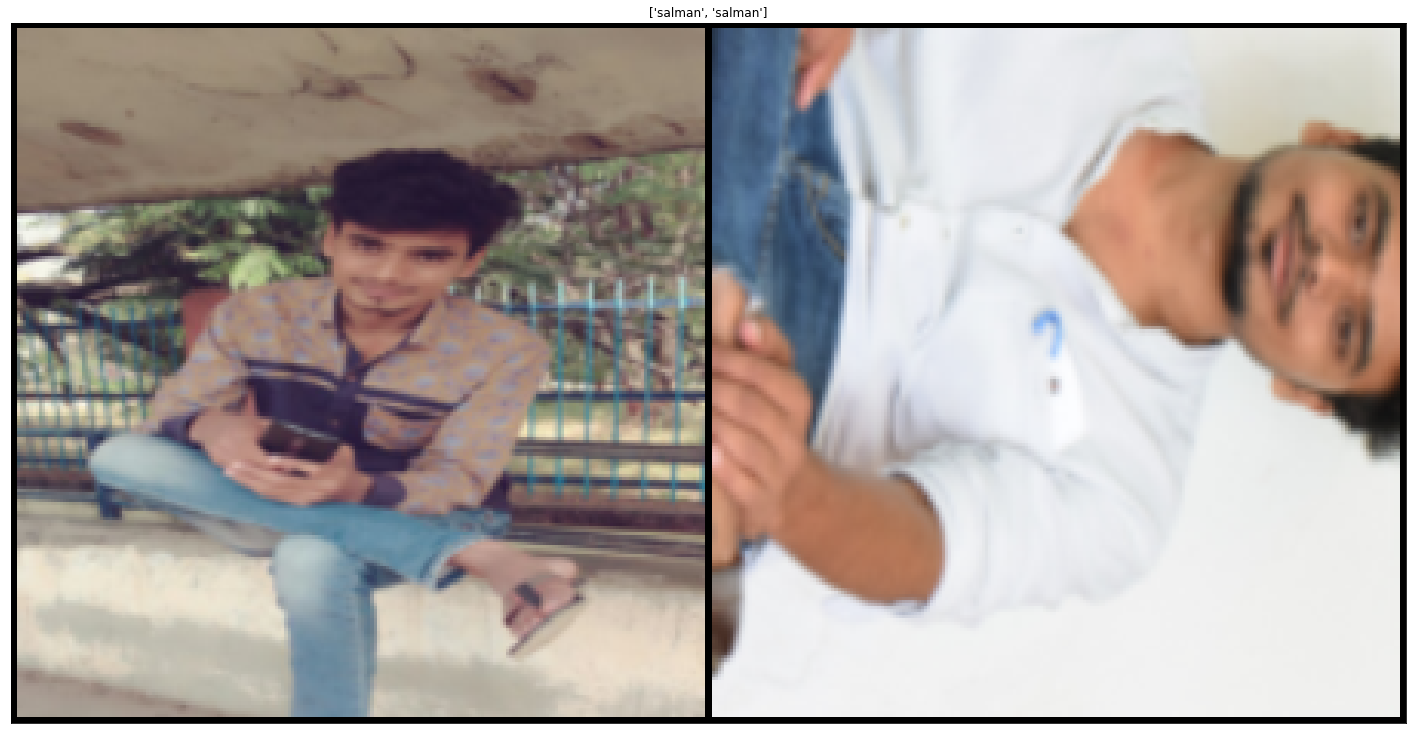

In [17]:
imshow(out,title=[class_name[x] for x in label_plot])

In [18]:
model = nn.Sequential(
nn.Conv2d(3,16,kernel_size=3,padding=0,stride=2),
nn.BatchNorm2d(16),
nn.ReLU(),
nn.MaxPool2d(2),
#nn.Dropout(0.2),
nn.Conv2d(16,32,kernel_size=3,padding=0,stride=2),
nn.BatchNorm2d(32),
nn.ReLU(),
nn.MaxPool2d(2),
#nn.Dropout(0.2),
nn.Conv2d(32,64,kernel_size=3,padding=0,stride=2),
nn.BatchNorm2d(64),
nn.ReLU(),
nn.MaxPool2d(2),
#nn.Dropout(0.2),
nn.Flatten(),
nn.Linear(3*3*64,10),    
nn.Dropout(0.5),
nn.Linear(10,2))

In [19]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [20]:
model = model.to(device)

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)
model.to(device)

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2))
  (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
  (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
  (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): ReLU()
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Flatten(start_dim=1, end_dim=-1)
  (13): Linear(in_features=576, out_features=10, bias=True)
  (14): Dropout(p=0.5, inplace=False)
  (15): Linear(in_features=10, out_features=2, bias=True)
)

In [22]:
#Train the network
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        #labels = labels.unsqueeze(1).float()
        labels = labels.to(device)
        #print(inputs)

        # zero the parameter gradients
        

        # forward + backward + optimize
        outputs = model(inputs)
        #print(outputs)
        #print(labels)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if (epoch+1) % 1 == 0:    # 
            print(f'epoch:{epoch+1},loss={running_loss}')
            running_loss = 0.0

print('Finished Training')

epoch:1,loss=0.47628164291381836
epoch:1,loss=2.685976028442383
epoch:1,loss=0.18355882167816162
epoch:1,loss=1.3077161312103271
epoch:1,loss=0.6670764088630676
epoch:1,loss=1.367501139640808
epoch:1,loss=1.1465728282928467
epoch:1,loss=0.8495509624481201
epoch:1,loss=0.5877348780632019
epoch:1,loss=2.001298666000366
epoch:1,loss=0.3732776939868927
epoch:1,loss=0.1266884058713913
epoch:1,loss=0.5081843733787537
epoch:1,loss=0.8443453311920166
epoch:1,loss=0.3660621643066406
epoch:1,loss=0.361887663602829
epoch:1,loss=0.5697271227836609
epoch:1,loss=1.9075560569763184
epoch:1,loss=0.553683876991272
epoch:1,loss=0.31174755096435547
epoch:1,loss=0.9413979053497314
epoch:1,loss=0.22293995320796967
epoch:1,loss=0.1778762936592102
epoch:1,loss=1.5762027502059937
epoch:1,loss=2.4783520698547363
epoch:1,loss=0.6915637254714966
epoch:1,loss=0.36464786529541016
epoch:1,loss=0.24786598980426788
epoch:1,loss=1.0667645931243896
epoch:1,loss=0.8226621747016907
epoch:1,loss=0.3845328986644745
epoch:1

epoch:6,loss=0.9550871253013611
epoch:6,loss=0.5985718965530396
epoch:6,loss=0.6540863513946533
epoch:6,loss=1.0648198127746582
epoch:6,loss=0.6697078347206116
epoch:6,loss=0.9767122268676758
epoch:6,loss=0.7471392154693604
epoch:6,loss=0.3116662800312042
epoch:6,loss=1.3418986797332764
epoch:6,loss=0.05427595227956772
epoch:6,loss=1.8666688203811646
epoch:6,loss=0.18288683891296387
epoch:6,loss=0.6932705044746399
epoch:6,loss=0.34308746457099915
epoch:6,loss=0.7487668991088867
epoch:6,loss=0.39442938566207886
epoch:6,loss=2.2042653560638428
epoch:6,loss=2.831683874130249
epoch:6,loss=0.08565407991409302
epoch:6,loss=0.9988096356391907
epoch:6,loss=0.8148394227027893
epoch:6,loss=0.1320025771856308
epoch:6,loss=1.3117698431015015
epoch:6,loss=0.5222160816192627
epoch:6,loss=0.5171410441398621
epoch:6,loss=1.0155421495437622
epoch:6,loss=0.3925589323043823
epoch:6,loss=0.4899384677410126
epoch:6,loss=0.5153350830078125
epoch:6,loss=2.395836114883423
epoch:6,loss=0.594208836555481
epoch:

In [23]:
dog_probs = []
model.eval()
with torch.no_grad():
    for data, fileid in test_loader:
        data = data.to(device)
        preds = model(data)
        preds_list = F.softmax(preds, dim=1)[:, 1].tolist()
        dog_probs += list(zip(list(fileid), preds_list))

In [24]:
preds_list

[0.9999916553497314, 0.9999901056289673]

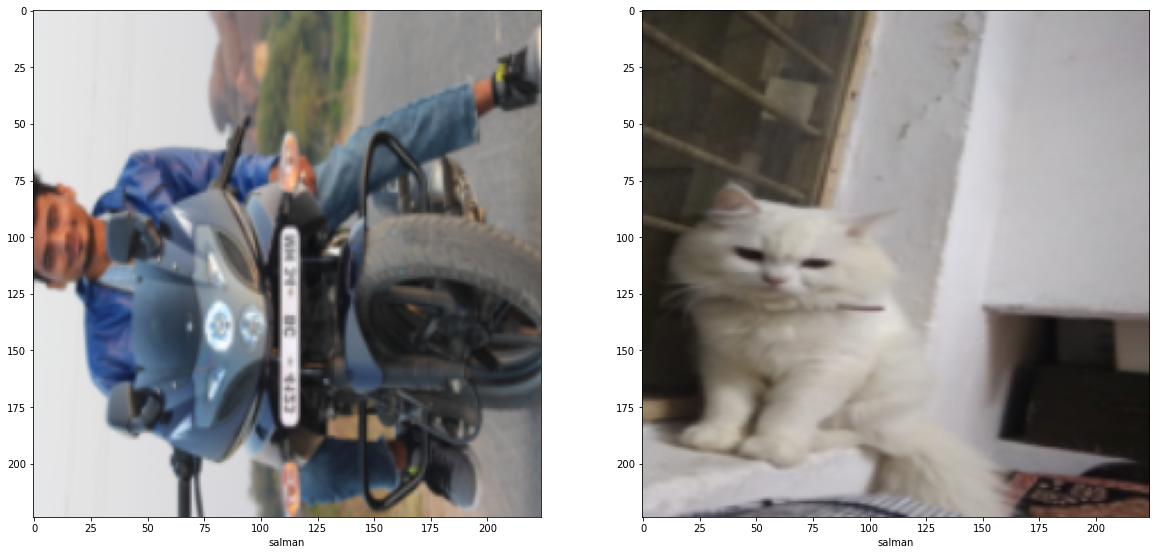

In [25]:
import numpy as np
test_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                         batch_size=batch_size, 
                         shuffle=True)

for features, targets in test_loader:
    break
    

predictions = model(features[0:2].to(device))
#print(predictions)
#predictions = int(predictions)
d = test_dataset.classes
#print(d)
#print(predictions)
predictions = torch.max(predictions,dim=1)[1]
predictions = predictions.cpu()
predictions = predictions.numpy()
#print(predictions)
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
for i in range(2):
    img = features[i]
    ax[i].imshow(np.transpose(img, (1, 2, 0)))
    ax[i].set_xlabel(d[predictions[i]])
    #print(int(np.array(predictions[i].item()).round()))

plt.show()